In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn import datasets 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error

In [2]:
# Loading pre-defined Boston Dataset 
boston_dataset = datasets.load_boston() 
# print(boston_dataset.DESCR) 

In [3]:
boston_dataset.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [4]:
boston_dataset.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [5]:
x_train, x_test, y_train, y_test = train_test_split(boston_dataset.data, 
                                                    boston_dataset.target,  
                                                    test_size = 0.25,
                                                   random_state = 41) 
  
print("Train data shape of X = % s and Y = % s : "%(x_train.shape, y_train.shape)) 
  
print("Test data shape of X = % s and Y = % s : "%(x_test.shape, y_test.shape)) 

Train data shape of X = (379, 13) and Y = (379,) : 
Test data shape of X = (127, 13) and Y = (127,) : 


In [6]:
# Apply multiple Linear Regression Model 
lreg = LinearRegression() 
lreg.fit(x_train, y_train) 
  
# Generate Prediction on test set 
lreg_y_pred = lreg.predict(x_test) 
  
# # calculating Root Mean Squared Error (rmse) 
root_mean_squared_error = np.sqrt(mean_squared_error(lreg_y_pred, y_test)) 
print("Root Mean squared Error on test set : ", root_mean_squared_error)   
    
# # Putting together the coefficient and their corrsponding variable names  
lreg_coefficient = pd.DataFrame() 
lreg_coefficient["Columns"] = boston_dataset.feature_names 
lreg_coefficient['Coefficient Estimate'] = pd.Series(lreg.coef_) 
lreg_coefficient

Root Mean squared Error on test set :  4.597800668458803


,Columns,Coefficient Estimate
0,CRIM,-0.044514
1,ZN,0.039383
2,INDUS,0.024568
3,CHAS,3.975857
4,NOX,-15.964512
5,RM,4.004434
6,AGE,0.015961
7,DIS,-1.295413
8,RAD,0.298655
9,TAX,-0.012213


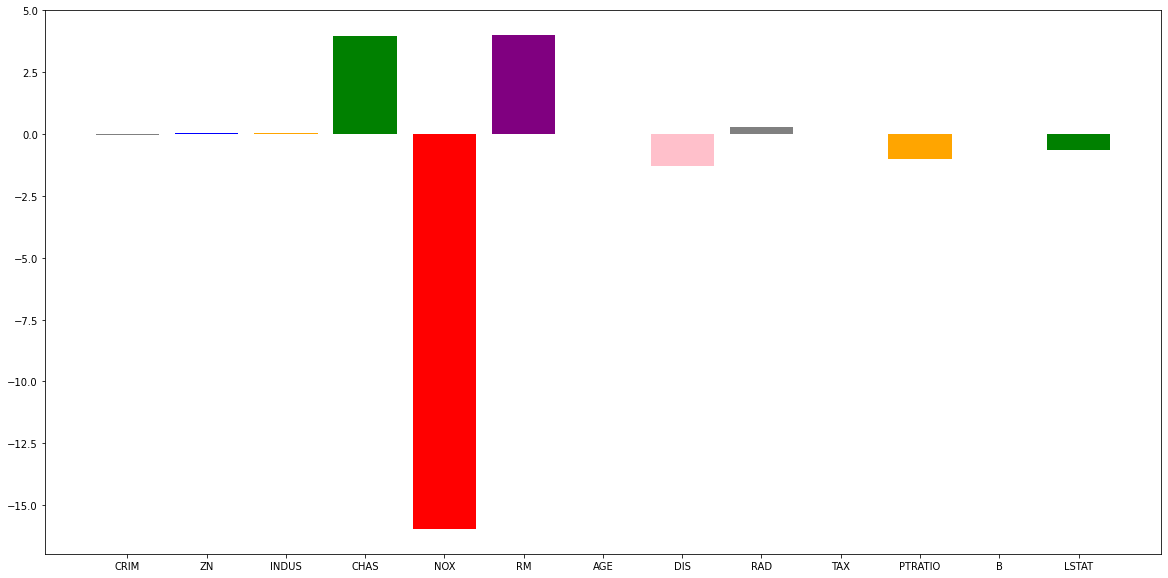

In [7]:
fig, ax = plt.subplots(figsize =(20, 10)) 
  
color =['gray', 'blue', 'orange','green', 'red', 'purple', 'brown',  
        'pink', 'gray', 'olive', 'orange',  'orange', 'green', 'blue', 'olive'] 
  
ax.bar(lreg_coefficient["Columns"],
       lreg_coefficient['Coefficient Estimate'],
       color = color) 
  
plt.style.use('ggplot') 
plt.show() 

In [8]:
# import ridge regression from sklearn library 
from sklearn.linear_model import Ridge 
  
# Train the model  
rmse=[]

'''  y = MX + B  '''

# check the below alpha values for Ridge Regression
alpha_list=[0.3, 0.5, 1, 3, 10, 30, 2, 0.02]

for alph in alpha_list:
    
    ridge_R = Ridge(alpha=alph, fit_intercept=True, normalize=True) 
    
    ridge_R.fit(x_train, y_train)
    
#     ridge_R_predict_train = ridge_R.predict(x_train)
    
    ridge_R_predict_test = ridge_R.predict(x_test)
    
    error = np.sqrt(mean_squared_error(ridge_R_predict_test, y_test))
    
    rmse.append(np.round(error,6))

print('RMSE Scores: ',rmse)



RMSE Scores:  [4.203424, 4.084851, 4.038995, 4.46231, 5.425059, 6.237453, 4.234604, 4.562467]


In [9]:
min(rmse)

4.038995

In [10]:
# Optimal Alpha
a = alpha_list[rmse.index(min(rmse))]
a

1

In [11]:
# Building Ridge Regression Model with optimal alpha

ridge = Ridge(alpha = a, fit_intercept=True, normalize=True)

ridge.fit(x_train, y_train)

# ridge_predict_train_1 = ridge.predict(x_train)

ridge_predict_test_1 = ridge.predict(x_test)

  
# get ridge coefficient and print them 
ridge_coefficient = pd.DataFrame()

ridge_coefficient["Columns"]= boston_dataset.feature_names 
ridge_coefficient['Coefficient Estimate'] = pd.Series(ridge.coef_) 


print('Coeff with alpha equal to ' + str(a))
ridge_coefficient 


Coeff with alpha equal to 1


,Columns,Coefficient Estimate
0,CRIM,-0.050918
1,ZN,0.018036
2,INDUS,-0.081809
3,CHAS,2.976834
4,NOX,-3.763169
5,RM,3.040296
6,AGE,-0.008074
7,DIS,-0.269382
8,RAD,-0.002596
9,TAX,-0.002677


Graph with alpha equal to 1


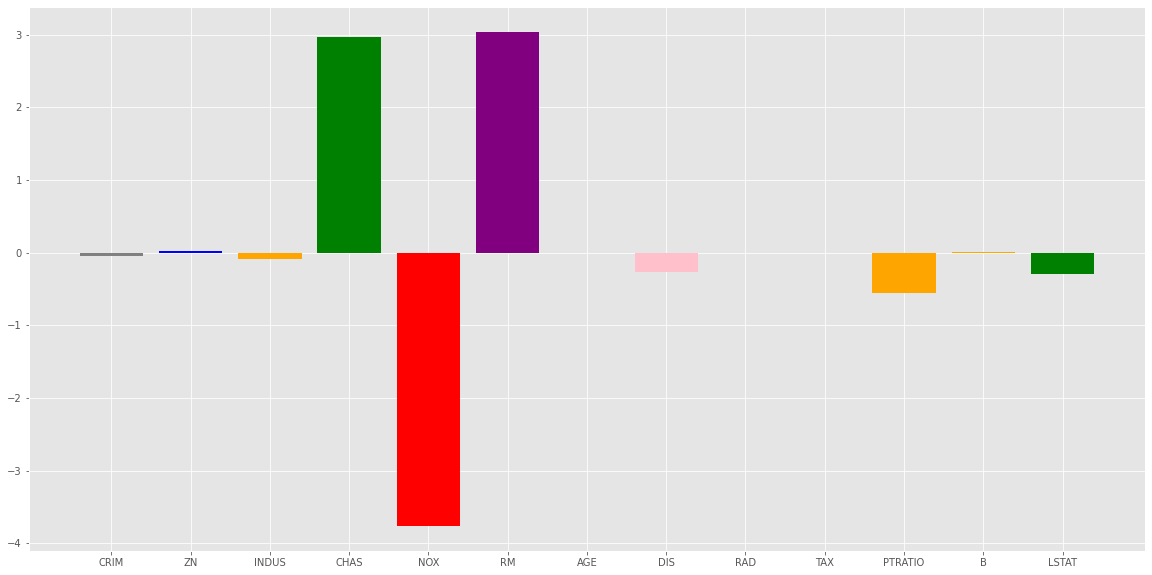

In [20]:
print('Graph with alpha equal to ' + str(ridge.alpha))

fig, ax = plt.subplots(figsize =(20, 10)) 
  
color =['gray', 'blue', 'orange','green', 'red', 'purple', 'brown',  
        'pink', 'gray', 'olive', 'orange',  'orange', 'green', 'blue', 'olive'] 
  
ax.bar(ridge_coefficient["Columns"],
       ridge_coefficient['Coefficient Estimate'],
       color = color) 
plt.style.use('ggplot') 
plt.show() 


In [12]:
# Building Ridge Regression Model with optimal alpha
ridge = Ridge(alpha = 20, fit_intercept=True, normalize=True)

ridge.fit(x_train, y_train)

ridge_predict_train_1 = ridge.predict(x_train)

ridge_predict_test_1 = ridge.predict(x_test)

testing_error = np.sqrt(mean_squared_error(ridge_predict_test_1, y_test))

training_error = np.sqrt(mean_squared_error(ridge_predict_train_1, y_train))

print('Testing RMSE ',testing_error)
print('Training RMSE ',training_error)

# get ridge coefficient and print them 
ridge_coefficient = pd.DataFrame()

ridge_coefficient["Columns"]= boston_dataset.feature_names 
ridge_coefficient['Coefficient Estimate'] = pd.Series(ridge.coef_) 


print('\nCoeff with alpha Penality equal to '+ str(ridge.alpha) )
ridge_coefficient 


Testing RMSE  5.976427795794801
Training RMSE  8.821851102787146

Coeff with alpha Penality equal to 20


,Columns,Coefficient Estimate
0,CRIM,-0.019236
1,ZN,0.005505
2,INDUS,-0.026800
3,CHAS,0.354910
4,NOX,-1.302565
5,RM,0.420992
6,AGE,-0.004694
7,DIS,0.031136
8,RAD,-0.015186
9,TAX,-0.001008


Graph with alpha equal to 20- Higher Penality


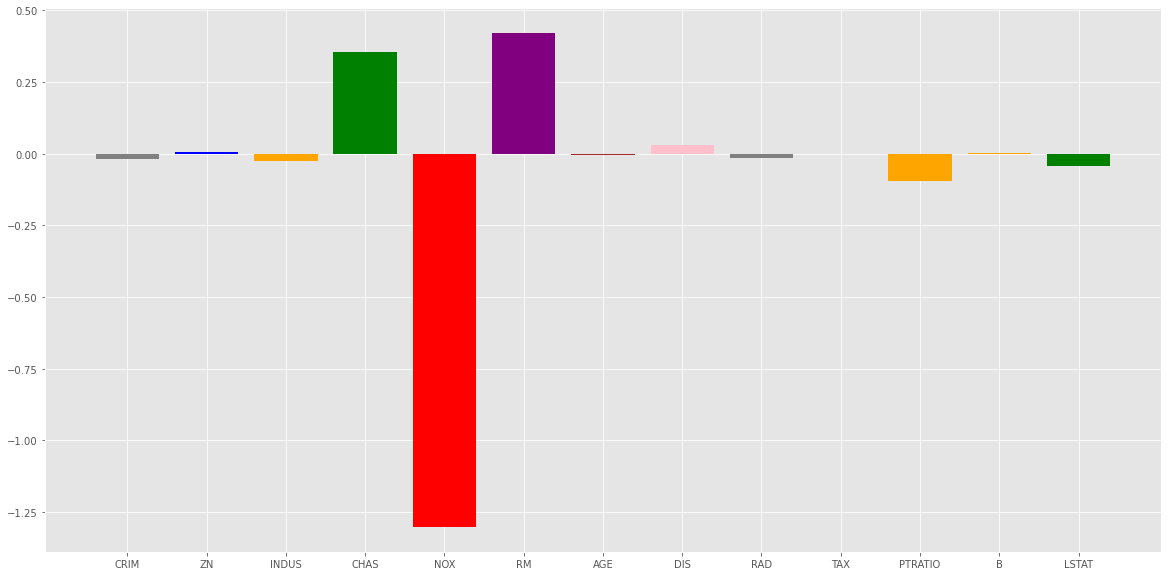

In [22]:
print('Graph with alpha equal to '+ str(ridge.alpha) + '- Higher Penality')

fig, ax = plt.subplots(figsize =(20, 10)) 
  
color =['gray', 'blue', 'orange','green', 'red', 'purple', 'brown',  
        'pink', 'gray', 'olive', 'orange',  'orange', 'green', 'blue', 'olive'] 
  
ax.bar(ridge_coefficient["Columns"],
       ridge_coefficient['Coefficient Estimate'],
       color = color) 
  
# ax.spines['center'].set_position('bottom') 

ax.xaxis.set_ticks_position('bottom')

plt.style.use('ggplot') 
plt.show() 


## LASSO - in this coefficients value will become zero, if higher penalty is imposed

In [13]:
from sklearn.linear_model import Lasso 
  
# Train the model 
alpha_1=[0.3,0.01,0.1, 0.5]
rmse_lasso = []

for alph_1 in alpha_1:
    lasso = Lasso(alpha=alph_1, fit_intercept=True, normalize=True) 
    lasso.fit(x_train, y_train)
    lasso_predict_train = lasso.predict(x_train)
    lasso_predict_test = lasso.predict(x_test)
    
    rmse_lasso.append([alph,np.sqrt(mean_squared_error(lasso_predict_test, y_test))])
print('LASSO RMSE Scores: ',rmse_lasso)


LASSO RMSE Scores:  [[0.02, 5.955410895593172], [0.02, 4.708496371577984], [0.02, 4.499397625732219], [0.02, 6.96053828293445]]


In [14]:
# Optimal Alpha
lasso_a = alpha_1[rmse_lasso.index(min(rmse_lasso))]
lasso_a

0.1

In [15]:
# Building Lasso Regression Model with optimal alpha
lasso = Lasso(alpha=lasso_a, fit_intercept=True, normalize=True)

lasso.fit(x_train, y_train)

lasso_predict_train = lasso.predict(x_train)

lasso_predict_test = lasso.predict(x_test)


# get lasso coefficient and print them 
lasso_coeff = pd.DataFrame() 
lasso_coeff["Columns"] = boston_dataset.feature_names 
lasso_coeff['Coefficient Estimate'] = pd.Series(lasso.coef_) 

print('Coeff with alpha equal to '+ str(lasso.alpha))
lasso_coeff 


Coeff with alpha equal to 0.1


,Columns,Coefficient Estimate
0,CRIM,-0.000000
1,ZN,0.000000
2,INDUS,-0.000000
3,CHAS,0.000000
4,NOX,-0.000000
5,RM,3.578766
6,AGE,-0.000000
7,DIS,-0.000000
8,RAD,-0.000000
9,TAX,-0.000000


In [21]:
# Building Lasso Regression Model with higher alpha
lasso_1 = Lasso(alpha=0.08, fit_intercept=True, normalize=True)

lasso_1.fit(x_train, y_train)

lasso_predict_train_1 = lasso_1.predict(x_train)
lasso_predict_test_1 = lasso_1.predict(x_test)


# get lasso coefficient and print them 
lasso_1_coeff = pd.DataFrame() 
lasso_1_coeff["Columns"] = boston_dataset.feature_names 
lasso_1_coeff['Coefficient Estimate'] = pd.Series(lasso_1.coef_) 

print('Coeff with alpha equal to '+ str(lasso_1.alpha))
lasso_1_coeff 



Coeff with alpha equal to 0.08


,Columns,Coefficient Estimate
0,CRIM,-0.000000
1,ZN,0.000000
2,INDUS,-0.000000
3,CHAS,0.000000
4,NOX,-0.000000
5,RM,3.809237
6,AGE,-0.000000
7,DIS,-0.000000
8,RAD,-0.000000
9,TAX,-0.000000


Graph with alpha equal to 0.1 Penality


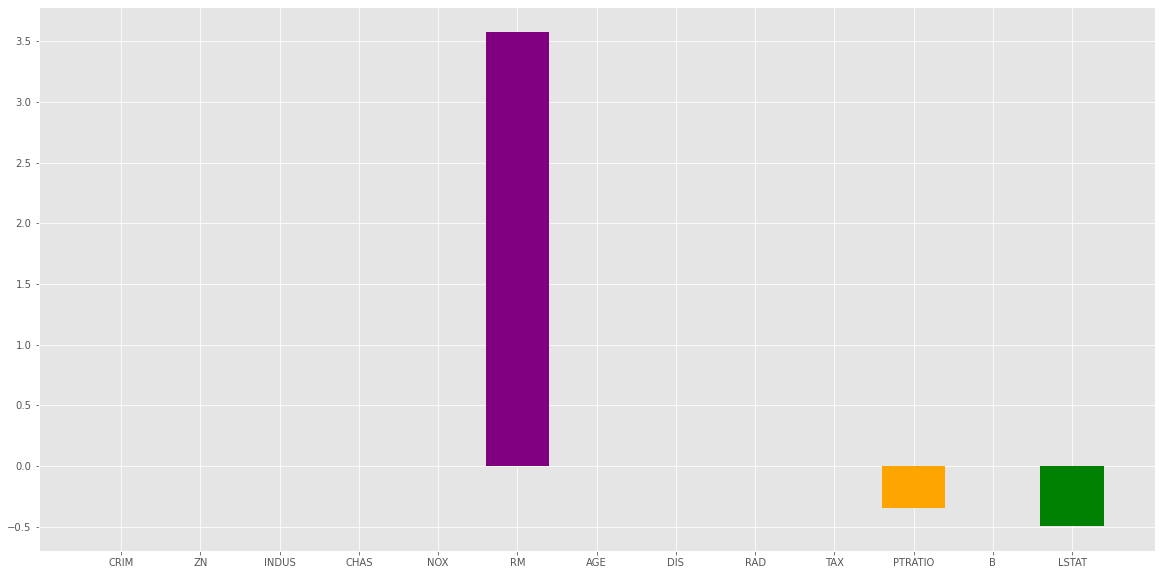

In [16]:
print('Graph with alpha equal to ' + str(lasso.alpha) + ' Penality')

fig, ax = plt.subplots(figsize =(20, 10)) 
  
color =['gray', 'blue', 'orange','green', 'red', 'purple', 'brown',  
        'pink', 'gray', 'olive', 'orange',  'orange', 'green', 'blue', 'olive'] 
  
ax.bar(lasso_coeff["Columns"],
       lasso_coeff['Coefficient Estimate'],
       color = color) 
  
# ax.spines['center'].set_position('bottom') 

ax.xaxis.set_ticks_position('bottom')

plt.style.use('ggplot') 
plt.show() 
